<a href="https://colab.research.google.com/github/ChennamaReddyRevanth/Machine-learning-projects/blob/main/ML_LAB1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML LAB/data_for_lr.csv')

# Drop the missing values
data = data.dropna()

# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output  = np.array(data.y[0:500]).reshape(500,1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output  = np.array(data.y[500:700]).reshape(199,1)

In [ ]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (train_output - predictions) * -1
        dm = np.mean(np.multiply(train_input, df))
        dc = np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):
        #initialize random parameters
        self.parameters['m'] = np.random.uniform(0,1) * -1
        self.parameters['c'] = np.random.uniform(0,1) * -1

        #initialize loss
        self.loss = []

        #iterate
        for i in range(iters):
            #forward propagation
            predictions = self.forward_propagation(train_input)

            #cost function
            cost = self.cost_function(predictions, train_output)

            #append loss and print
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(i+1, cost))

            #back propagation
            derivatives = self.backward_propagation(train_input, train_output, predictions)

            #update parameters
            self.update_parameters(derivatives, learning_rate)

        return self.parameters, self.loss


In [ ]:
#Example usage
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)

Iteration = 1, Loss = 4157.828010685921
Iteration = 2, Loss = 1890.683739026987
Iteration = 3, Loss = 862.0778717871431
Iteration = 4, Loss = 395.3982504884223
Iteration = 5, Loss = 183.6651893858589
Iteration = 6, Loss = 87.60166503360972
Iteration = 7, Loss = 44.01753762532446
Iteration = 8, Loss = 24.24337073885907
Iteration = 9, Loss = 15.271809314037105
Iteration = 10, Loss = 11.201401952574148
Iteration = 11, Loss = 9.354653618377666
Iteration = 12, Loss = 8.516781847868664
Iteration = 13, Loss = 8.13663849177822
Iteration = 14, Loss = 7.964167024308624
Iteration = 15, Loss = 7.885916522732545
Iteration = 16, Loss = 7.850414177745662
Iteration = 17, Loss = 7.8343067187532105
Iteration = 18, Loss = 7.826998741019296
Iteration = 19, Loss = 7.823683097679338
Iteration = 20, Loss = 7.82217878087628


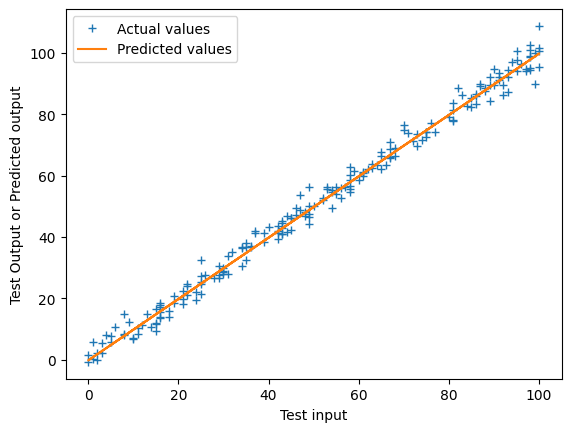

In [ ]:
#Prediction on test data
y_pred = test_input*parameters['m'] + parameters['c']

# Plot the regression line with actual data pointa
plt.plot(test_input, test_output, '+', label='Actual values')
plt.plot(test_input, y_pred, label='Predicted values')
plt.xlabel('Test input')
plt.ylabel('Test Output or Predicted output')
plt.legend()
plt.show()